<a href="https://colab.research.google.com/github/xiscoding/utils/blob/main/nyquist_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundemental Sampling Theorem
The theorem states that the sample rate must be at least twice the bandwidth of the signal to avoid aliasing.


## Determining day/night cycle of the earth given the day, night frequencies

To show the difficulty of recreating a continuous signal with a set of samples, we demonstrate how by only constructing a graph with the sample points it can be hard to represent the actual signal without further work.

In [ ]:
!pip install astral

In [ ]:
from astral import LocationInfo
from astral.sun import sun
from datetime import date, timedelta
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
HOURS_IN_DAY = 24
MINS_IN_HOUR = 60

In [15]:
def calculate_sample_values(freq_day, freq_night, total_hours, sample_rate):
    """
    Calculate sample times and corresponding y-values for given parameters.
    """
    #t0 = (1/freq_day)/4  # First point when amplitude = 1
    sample_times = np.arange(0, total_hours, sample_rate)
    sample_values = []

    for sample_time in sample_times:
        if sample_time % HOURS_IN_DAY < (1/freq_day):
            y_value = np.cos(2 * np.pi * freq_day * (sample_time % HOURS_IN_DAY))
        else:
            y_value = np.cos(2 * np.pi * freq_night * ((sample_time % HOURS_IN_DAY) - (1/freq_day)))
        sample_values.append(y_value)

    return sample_times, sample_values

def plot_day_night_cycle_with_sampling(freq_day=1/14, freq_night=1/10, total_hours=96, num_cycles=4, sample_rate=5):
    """
    Refactored function with shared logic extracted.
    """
    plt.figure(figsize=(20, 4))
    # Day/night cycle plotting logic remains the same...

    # Use the new function to get sample times and values
    sample_times, sample_values = calculate_sample_values(freq_day, freq_night, total_hours, sample_rate)

    # Plotting samples with points and lines
    for sample_time, y_value in zip(sample_times, sample_values):
        plt.plot(sample_time, y_value, 'bo')
        plt.vlines(sample_time, ymin=0, ymax=y_value, colors='b', linestyles='dotted')

    plt.xlabel('Time (hours)')
    plt.ylabel('Amplitude')
    plt.title('Day and Night Signal with Sampling')
    plt.grid(True)
    plt.show()

def plot_sampling_step_graph(freq_day=1/14, freq_night=1/10, total_hours=96, sample_rate=1.25):
    """
    Refactored function with shared logic extracted.
    """
    # Use the new function to get sample times and values
    sample_times, sample_values = calculate_sample_values(freq_day, freq_night, total_hours, sample_rate)

    # Prepare step graph data...
    step_times = np.empty(2 * len(sample_times))
    step_times[0::2] = sample_times
    step_times[1::2] = sample_times + sample_rate
    step_values = np.repeat(sample_values, 2)

    plt.figure(figsize=(20, 4))
    plt.step(step_times, step_values, where='post', label='Sampled Signal')
    plt.xlabel('Time (hours)')
    plt.ylabel('Amplitude')
    plt.title('Step Graph of Sampled Signal')
    plt.grid(True)
    plt.legend()
    plt.show()

# Now, you can call either function without duplicating the logic for calculating sample times and values.


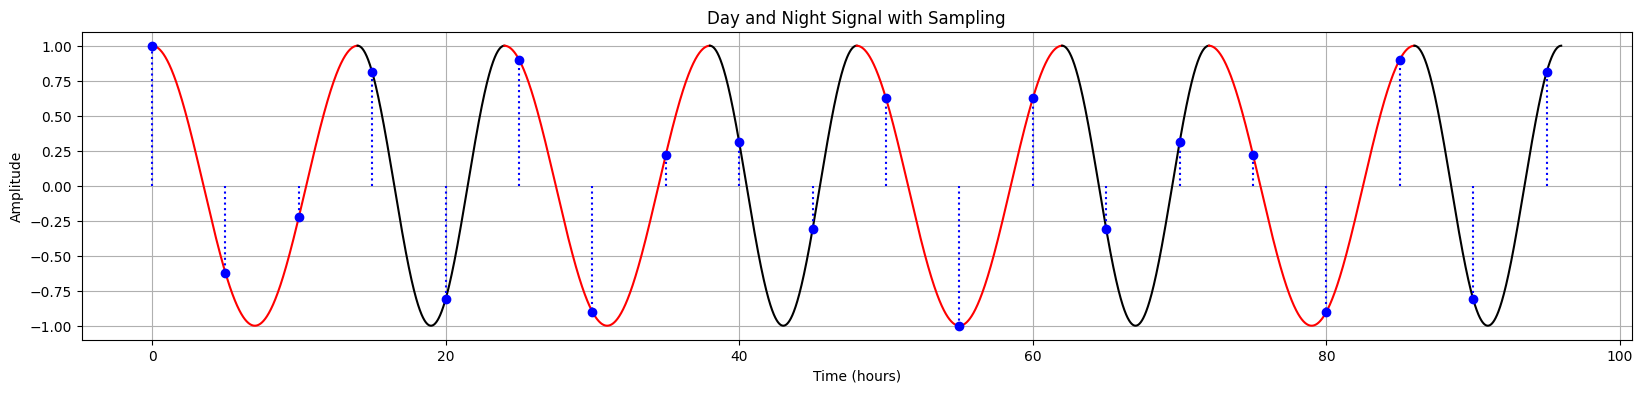

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def plot_day_night_cycle_with_sampling_and_signal(freq_day=1/14, freq_night=1/10, total_hours=96, num_cycles=4, sample_rate=5):
    """
    Plots a combined sinusoidal representation of day and night durations over a specified time period,
    with points and lines to the time axis added at every specified sample rate interval, starting at t=3.5 hours.

    Parameters:
    - freq_day: Frequency of the day signal (hours^-1). Default is 1/14.
    - freq_night: Frequency of the night signal (hours^-1). Default is 1/10.
    - total_hours: Total duration in hours to plot. Default is 720 hours (30 days).
    - num_cycles: Number of 24-hour cycles to plot. Automatically calculated if not specified.
    - sample_rate: Interval in hours at which to sample the signal and plot points/lines. Default is 3.5 hours.
    """
    plt.figure(figsize=(20, 4))

    # Define the time range with 1-minute granularity
    time_month = np.linspace(0, total_hours, total_hours * MINS_IN_HOUR)

    for i in range(num_cycles):
        # Calculations for each day/night cycle
        start_day = i * HOURS_IN_DAY * MINS_IN_HOUR
        end_day = int(i * HOURS_IN_DAY + (1/freq_day)) * MINS_IN_HOUR
        start_night = end_day
        end_night = (i + 1) * HOURS_IN_DAY * MINS_IN_HOUR

        # Plot daytime in red
        time_day = np.linspace(start_day / MINS_IN_HOUR, end_day / MINS_IN_HOUR, (end_day - start_day))
        signal_day = np.cos(2 * np.pi * freq_day * (time_day - start_day / MINS_IN_HOUR))
        plt.plot(time_day, signal_day, 'r')

        # Plot nighttime in black
        time_night = np.linspace(start_night / MINS_IN_HOUR, end_night / MINS_IN_HOUR, (end_night - start_night))
        signal_night = np.cos(2 * np.pi * freq_night * (time_night - start_night / MINS_IN_HOUR))
        plt.plot(time_night, signal_night, 'k')

    # Adding samples with corrected logic for points and lines
    #t0 = (1/freq_day)/4 #first point when amplitude = 1
    sample_times = np.arange(0, total_hours, sample_rate)
    for sample_time in sample_times:
        if sample_time % HOURS_IN_DAY < (1/freq_day):
            y_value = np.cos(2 * np.pi * freq_day * (sample_time % HOURS_IN_DAY))
        else:
            y_value = np.cos(2 * np.pi * freq_night * ((sample_time % HOURS_IN_DAY) - (1/freq_day)))
        plt.plot(sample_time, y_value, 'bo')
        plt.vlines(sample_time, ymin=0, ymax=y_value, colors='b', linestyles='dotted')

    plt.xlabel('Time (hours)')
    plt.ylabel('Amplitude')
    plt.title('Day and Night Signal with Sampling')
    plt.grid(True)
    plt.show()

# Example call with default parameters
plot_day_night_cycle_with_sampling_and_signal()


In [17]:
def nyquist_example(freq_day=1/14, freq_night=1/10, total_hours=96, num_cycles=4, sample_rate=1.25):
  plot_day_night_cycle_with_sampling_and_signal(freq_day, freq_night, total_hours, num_cycles, sample_rate)
  plot_day_night_cycle_with_sampling(freq_day, freq_night, total_hours, num_cycles, sample_rate)
  plot_sampling_step_graph(freq_day, freq_night, total_hours, sample_rate)

maximum frequency possible in space -> nyquist is good

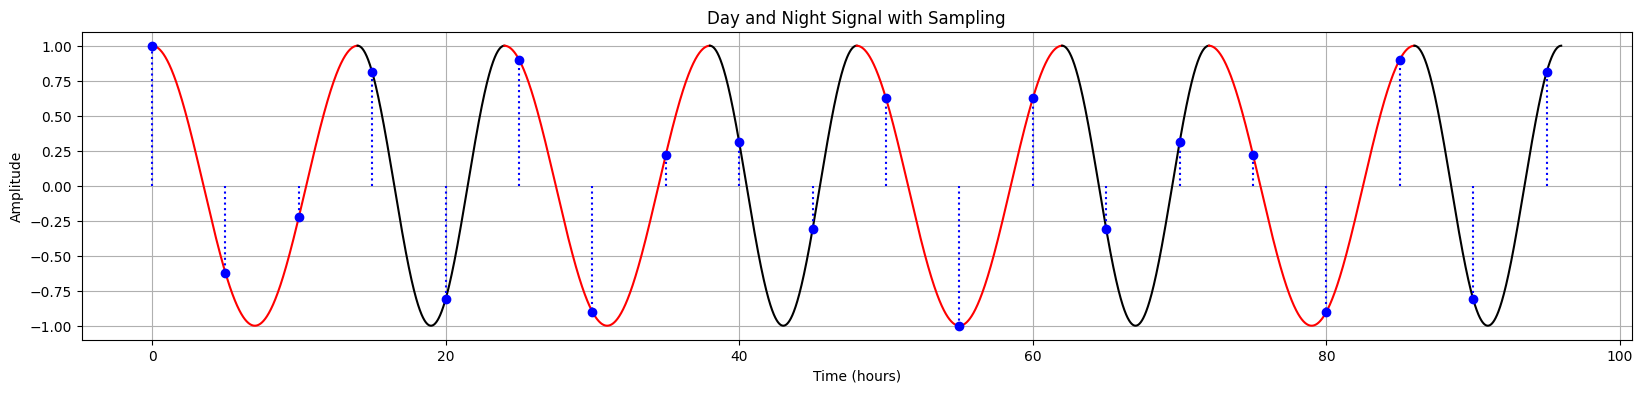

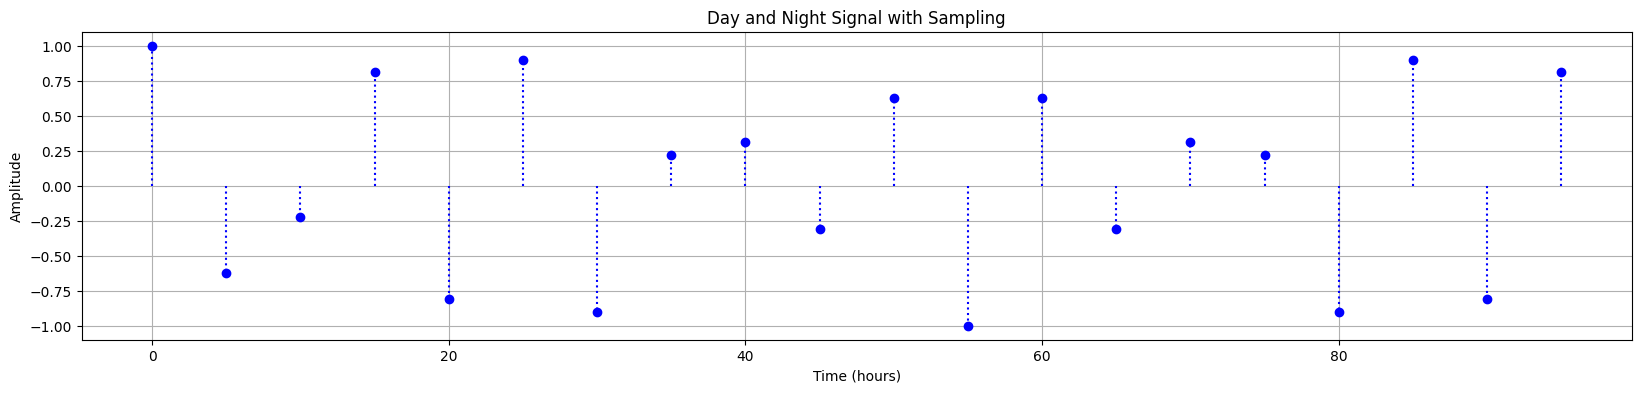

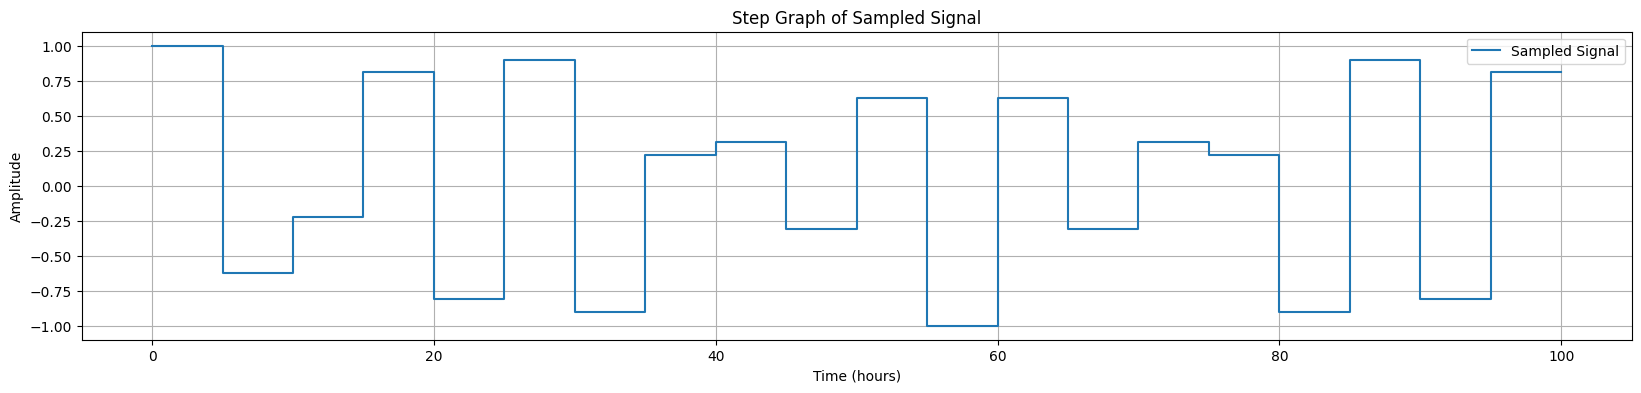

In [21]:
nyquist_example(freq_day=1/14, freq_night=1/10, total_hours=96, num_cycles=4, sample_rate=5)